<a href="https://colab.research.google.com/github/ravichas/bioinformatics/blob/main/BioConductor/RNASeq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepared for BIFX-550
Sarangan **Ravi**chandran

Last updated 12/24/2023

# RNASeq

* Goal is to identify genes/transcripts which are expressed at different levels between our defined sample groups
* Common approach is the differential gene/transcript expression (DGE/DTE)

Important steps:
* Alignment and counting
* Diff gene expression
* Visualization (PCA)
* Gene set analysis
* Diff Transcript Utilization Analysis


## Basics

* 1970s : Northern Blot
* 1980s : qPCR
* 1990s : Microarrays
* Present: RNA-Seq

RNASeq

* No prior information is needed
* Massively high-throughput
* SNPs


What is RNA-Seq?

* Begin with cell or tissues
* expressed genes
* HTS
* learn about changes in gene expression or novel splicing events

INtro to NGS

WGS
* input DNA
* Fragmentation
* Adaptor ligation
* Sequencing

Read:

A sequence (dsDNA) of a nucleotide that is sequenced.

Sequencing options:
* Single-end sequencing
  * Studying gene expression changes
* PES uses
  * WGS
  * Alternative splicing
  * De novo transcriptome studies

Key points:
* Read Lengths
  * Real Lengths can vary in length (ex., 75/150/300 nt)
    * 75 nt is common read length
  * Short reads: Ideal for gene expression, resequencing
  * Longer reads: Suitable for transcriptomes, WGS for eukaryotes
* Coverage:
  * If a position in a genome is covered by 2 reads, we describe this as 2x coverage
  * If another position in a genome is covered by 4 reads, then this is called 4x coverage
  * To get the coverage for the whole region. Add all the coverages and divide by the position to get the coverage for the region
* Most of the RNA in a cell is not mRNA
  * ribosomalRNA: ~ 85-86%
  * tRNA: ~ 10-12%
  * mRNA: ~ 2-3%
  * cRNA/lncRNA, miRNA: < 2%
* If you are starting with totalRNA, you need enrichment to get to mRNA. For eukaryotes, we can use either one of the following options:
  * Poly-A enrichment: Use special beads that bding to Poly-A tails in mRNA
  * rRNA depletion: To target mRNA plus special RNAs like micro RNAs


Designing a project: Which option is suitable?

* De novo transcriptome assembly
  * Need greater sequencing depth
  * Longer reads
* Single-End-Sequencing
  * Study changes in gene expression
* Identify Novel transcripts
  * Paired-end-Sequencing
  * Greater sequencing depth
  

# RNA-seq workflow:
* Library prep
  * Clonal Amplification/cluster generation
* Bridge PCR
* Sequencing by Synthesis
* Analytis

# Detail steps:
* Access Quality
  * is mRNA degraded?
    * Yes: Repair
    * No: Proceed with Poly-A Selection
* Convert input RNA to DNA
* Basic Library Preparation
  * Fragmentation (to deal with DNA of different sizes; this process creates equal sized fragments)
    * To create eqaul sized fragments
      * QC: Example, Agilent Bioanalyzer   
    * Adapter ligation
      * QC: qPCR
* Cluster Generation/Brige PCR
  * Issues: Overclustering will lead to sequencing failures
  * Issues: Underclustering will lead to low sequencing output.


QC (common) technologies:

* Qubit: Measure DNA concentration to resolve low amount of starting material; Remedies: Amplify mRNA using poly-A tail before RNASeq
  * The amount of nucleic acids present in the sample.
  * How much is sequenceable library present in the sample
* Agilent Bioanalyzer: Analyze DNA library and access fragmentation quality; typically large # of larger fragment size is good
* qPCR: What % of the prepared library contain actual sequences. This is typically used during Adapter Ligation step in Library preparation.




  

NGS Data

* Raw Data (Raw Sequencing Data) --> FASTQ (fasgta plus QC info) --> ..? --> Data Anlaysis

Example pipeline

Fastq --> Alignment --> Normalize (essential before analysis) --> Analyze --> Publish

Normalization:

How can we normalize the data?

* Normalize the # of reads/sample
* Normalize the # of reads/gene, considering genes are of different lengths

Let us talk about Normalization:

Let us take three samples: A, B and C
* A: 20M reads
* B: 30M reads
* C: 10M reads

Without normalization, we will come to the conclusion that sample C has 1/3 of gene expression compare dto sample B.

Next, we need to normalize relative to length of the gene. For example, gene AA - 1kb and gene BB - 2 kb. For example, if gene A has 5 reads and gene B has 10 reads. But gene B is twice as long. Again, if we dont normalize, we might conclude that B is expressed more compared to A.

```
Gene A-1kb

-------------------
-----   ------------
  -------   
       ----------
  ----
```
```
Gene B-2kb
----------------------------------------
------       -------     --------- -----
    --------     --------
         --------              -------            
                      ---------
  ------                       
```

Taking into these two constraints, a new measure was introduced:

Fragments per Kilobase of transcript per Million mapped reads (FPKM)

FPKM = Normalized estimation of gene expression based on RNA-seq data. The relative expression of a transcript is proportional to the # of cDNA fragments that originate from it.






After normalization,

FPKM   |   Control Sample | Treated
-------|------------------|--------
Gene A |   2              |   10
Gene B |   2              |    2



# Analysis

*  Clustering
  * Heatmaps to see any difference between genomic expression between samples and contorl
* PCA
* Functional Analysis

# Encode

* Efforts began in 2003
* Goal is to identify all functional elements in the genome (human)
* Transcriptomic Bi data --> epigenetic/genetic regulation info


# The Cancer Genome Atlas (TCGA)
* Efforts began in 2005
* Goal is to collect/analyze patient tumor samples to understand disease progression
* visit https://www.cancer.gov/ccg/research/genome-sequencing/tcga

In [ ]:
# print(installed.packages())

## Bioconductor

Let us install Bioconductor and run some genomics modeling

In [ ]:
# 12 sec
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'BiocVersion'

Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



In [ ]:
# 1 min

if (!dir.exists("rnaseq")) {
  dir.create("rnaseq")
}

BiocManager::install('RockefellerUniversity/RU_RNAseq', subdir='rnaseq')
#BiocManager::install('SummarizedExperiment')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing github package(s) 'RockefellerUniversity/RU_RNAseq'




Error in utils::download.file(url, path, method = method, quiet = quiet,  : 
  download from 'https://api.github.com/repos/RockefellerUniversity/RU_RNAseq/tarball/HEAD' failed


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



In [ ]:
# 57 sec
BiocManager::install('GEOquery')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'GEOquery'

also installing the dependencies ‘BiocGenerics’, ‘statmod’, ‘R.oo’, ‘R.methodsS3’, ‘Biobase’, ‘limma’, ‘R.utils’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



In [ ]:
# 2 sec
BiocManager::install('SummarizedExperiment')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Installing package(s) 'SummarizedExperiment'

also installing the dependencies ‘zlibbioc’, ‘bitops’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘S4Arrays’, ‘DelayedArray’


Old packages: 'bit', 'bslib', 'callr', 'curl', 'data.table', 'DBI', 'dbplyr',
  'devtools', 'digest', 'gargle', 'ggplot2', 'gh', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'systemfonts',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun', 'zip',
  'codetools', 'lattice', 'nlme'



## What is BioConductor??
* Open-source, repository for Biology data software
* Provides infrastructure in R for reproducible research
  * Uses S3/S4 data objects
  * Public access software repo
  * Experimental/annotation packages

https://www.bioconductor.org/
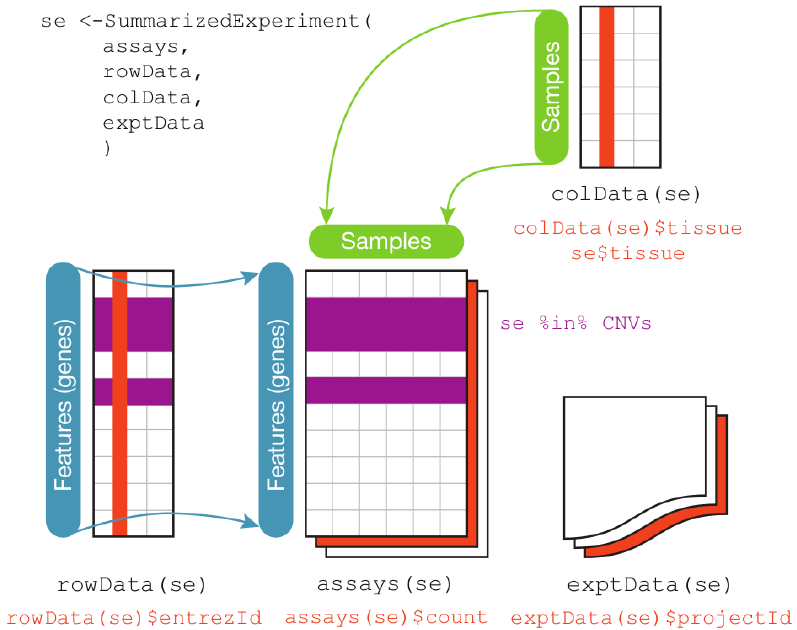

# GEO

According to NCBI/GEO, GEO is a,

*Gene Expression Omnibus (GEO) is a public functional data repository supporting MIAME-compliant data submissions. Array- and sequence-based data are accepted. Tools are provided to help users query and download experiments and cureated gene expression profiles*

Note that in GEO, DB entries are connected to record accessions. And each record types are identified by a specific id. Here are some conventions:

* Platform `GPL[0-9]+`
  * Summary of microarray or sequencer platform

* Sample `GSM[0-9]+`
  * Describes experimental conditions/results for a single sample.

* Series `GSE[0-9]+`
  * Links related samples
  * May contain multiple platform/sample records

* Datasets `GSD[0-9]+`
  * NCBI staff curated datassets

  

In [ ]:
library(GEOquery)
if (!dir.exists("GEO")) {
  dir.create("GEO")
}

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



# `getGEO`

* The GEOQuery package funciton to access GEO records

In [ ]:
gse <- getGEO(GEO = "GSE103512", destdir = "GEO") # 32 secGSE

Found 1 file(s)

GSE103512_series_matrix.txt.gz



In [ ]:
# 50 sec
gse <- getGEO(GEO = "GSE103512", destdir = "GEO")

# GSE103512

Go to NCBI and explore GSE103512 record.

This GEO Series describes human gene expression profiles of breast, colorectal, prostrate, and non-small lung cancer.

Check out the summary:
* What is the experiment type?
* Summary?
* Overall design?
* Publication
* What year?
* What platform?
* How many samples?

In [ ]:
list.files("GEO")

In [ ]:
tempdir() # GEO default download directory

[1] "/tmp/RtmprRprHV"

In [ ]:
gse

Exploring GSE object:


In [ ]:
class(gse)

[1] "list"

In [ ]:
length(gse)

[1] 1

Note that gse is an ExpressionSet object.  

`ExpressionSet` Components:

* `assayData`
  * Matrix data (microarray or RNASeq)
  * Rows: In this case, 54715, genes or probes
  * Columns: (n=280): Correspond to samples (assay)
* `phenoData`
  * Metadata annotations corresponding to experimental samples
    * Treatment conditions, genotype, cellline/tissue ino etc.
    * Sample links (if any) to other NCBI resources (SRA etc.)
* `featureData`
  * Annotations corresponding to assay probes (genomic range etc.)
* `Annotation`
  * GEO platform record or other information

In [ ]:
class(gse)

[1] "list"

In [ ]:
str(gse) # list of one

List of 1
 $ GSE103512_series_matrix.txt.gz:Formal class 'ExpressionSet' [package "Biobase"] with 7 slots
  .. ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  .. .. .. ..@ name             : chr "Wei-Yi,,Cheng"
  .. .. .. ..@ lab              : chr ""
  .. .. .. ..@ contact          : chr ""
  .. .. .. ..@ title            : chr "Gene expression profiles of breast, colorectal, prostate, and non-small cell lung cancer"
  .. .. .. ..@ abstract         : chr "Gene expression profiles from 280 formalin-fixed and paraffin embedded normal and tumor samples of four cancer types"
  .. .. .. ..@ url              : chr "https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103512"
  .. .. .. ..@ pubMedIds        : chr "29133367"
  .. .. .. ..@ samples          : list()
  .. .. .. ..@ hybridizations   : list()
  .. .. .. ..@ normControls     : list()
  .. .. .. ..@ preprocessing    : list()
  .. .. .. ..@ other            :List of 23
  .. .. .. .. ..$ contact_addres

`ExpressionSet` objects are older Bioconductor data structure.

Let us take the ExpressionSet object and convert it into `SummarizedExperiment` data structure. This class is used in lot of packages for the analysis of RNASeq, Methyl-seq, CHIP-seq, scRNAseq etc.



In [ ]:
library(SummarizedExperiment)
gse103512 <- as(gse$GSE103512_series_matrix.txt.gz, "SummarizedExperiment")

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2

In [ ]:
class(gse)

[1] "list"

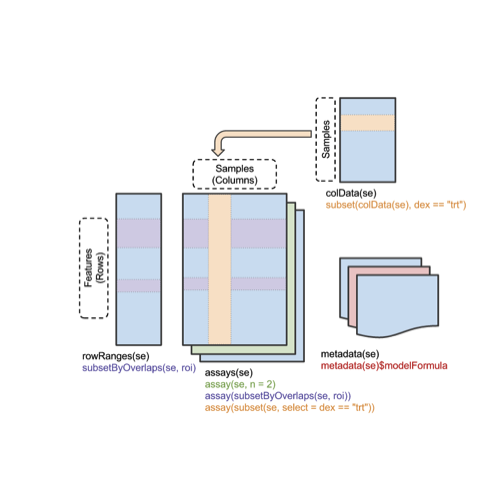

`SummarizedExperiment` Components:

* `assays`
  * Matrix data (microarray or RNASeq)
  * Rows: In this case, 54715, genes or features or probes
  * Columns: (n=280): Correspond to samples (assay)
* `rowData`
  * Feature metadata (e.g. Entrez/ensembl ids, gene symbols)
  * class extension `RangesSummarizedExperiment` accomodates `GRanges` (Genomic Ranges data)
* `colData`
  * Sample level covariate data (tissue, cell line, genotype, experiment etc.)
* `metadata`
  * List of experimental information
    * objects retained from `ExpressionSet` (ex. MIAME object)  

# Brief introduction to S4 class

S4 is a special class defined to deal with complex data structures like genomic data. (References: Hadley Wickem (OOP system in R) and O'Neil (2017)).

1. Formal Definition of S4

Unlike S3 classes, which rely on object attributes for classification, S4 classes have a formal definition using the setClass function. This definition specifies the **class name, a list of slots (like member variables), and optional parent classes for inheritance**. This formal structure enables stricter type checking and clearer program logic.

2. Slots:

Slots are named components that hold the data associated with an object of a specific S4 class. Each slot has a defined type, ensuring data consistency and preventing the accidental assignment of incompatible values. Think of slots as containers that hold specific types of information relevant to the class.

3. Methods:

Methods are functions that operate on objects of a particular class. They can be defined within the class definition using the setMethod function and are dispatched based on the class of the first argument. This allows for custom handling of different types of objects, promoting code reuse and cleaner logic.

4. Multiple Inheritance:

S4 classes support multiple inheritance, enabling a class to inherit features and properties from multiple parent classes. This allows for building complex object hierarchies and reusing common functionality across different classes.

5. Generic Functions:

Generic functions are functions that can operate on objects of different classes, leveraging specific methods based on the object's type. This promotes flexibility and enables generic code that can handle various object types with appropriate behavior.



In [ ]:
# confirm that gse is not S4 class
typeof(gse)
isS4(gse)

[1] "list"

[1] FALSE

In [ ]:
# checing whether S4 or not

is(gse103512, "SummarizedExperiment")

isS4(gse103512)

typeof(gse103512)

getClass("SummarizedExperiment")

[1] TRUE

[1] TRUE

[1] "S4"

Class "SummarizedExperiment" [package "SummarizedExperiment"]

Slots:
                                                                              
Name:            colData            assays             NAMES   elementMetadata
Class:         DataFrame    Assays_OR_NULL character_OR_NULL         DataFrame
                        
Name:           metadata
Class:              list

Extends: 
Class "RectangularData", directly
Class "Vector", directly
Class "Annotated", by class "Vector", distance 2
Class "vector_OR_Vector", by class "Vector", distance 2

Known Subclasses: 
Class "RangedSummarizedExperiment", directly, with explicit coerce

In [ ]:
# may or may not have all slots filled in
slotNames(gse103512)

[1] "colData"         "assays"          "NAMES"           "elementMetadata"
[5] "metadata"

In [ ]:
metadata(gse103512)

$experimentData
Experiment data
  Experimenter name: Wei-Yi,,Cheng 
  Laboratory:  
  Contact information:  
  Title: Gene expression profiles of breast, colorectal, prostate, and non-small cell lung cancer 
  URL: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103512 
  PMIDs: 29133367 

  Abstract: A 17 word abstract is available. Use 'abstract' method.
  notes:
   contact_address:     
      Roche Translational and Clinical Research Center, 430 East 29th Street
   contact_city:     
      New York
   contact_country:     
      USA
   contact_department:     
      Pharma Research and Early Development
   contact_institute:     
      Roche Innovation Center New York
   contact_name:     
      Wei-Yi,,Cheng
   contact_state:     
      New York
   contact_zip/postal_code:     
      10016
   contributor:     
      Jurriaan,,Brouwer-Visser
Wei-Yi,,Cheng
Anna,,Bauer-Mehren
Daniela,,Maisel

Katharina,,Lechner
Emilia,,Andersson
Joel,T,Dudley
Francesca,,Milletti
   geo_accession

In [ ]:
class(metadata(gse103512)) # returns a list

[1] "list"

In [ ]:
names(metadata(gse103512))

[1] "experimentData" "annotation"     "protocolData"

You can add custom metadata to the list

In [ ]:
metadata(gse103512)$formula <- expres ~ cancer.types.ch1 + normal.ch1

In [ ]:
metadata(gse103512)['experimentData']

$experimentData
Experiment data
  Experimenter name: Wei-Yi,,Cheng 
  Laboratory:  
  Contact information:  
  Title: Gene expression profiles of breast, colorectal, prostate, and non-small cell lung cancer 
  URL: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103512 
  PMIDs: 29133367 

  Abstract: A 17 word abstract is available. Use 'abstract' method.
  notes:
   contact_address:     
      Roche Translational and Clinical Research Center, 430 East 29th Street
   contact_city:     
      New York
   contact_country:     
      USA
   contact_department:     
      Pharma Research and Early Development
   contact_institute:     
      Roche Innovation Center New York
   contact_name:     
      Wei-Yi,,Cheng
   contact_state:     
      New York
   contact_zip/postal_code:     
      10016
   contributor:     
      Jurriaan,,Brouwer-Visser
Wei-Yi,,Cheng
Anna,,Bauer-Mehren
Daniela,,Maisel

Katharina,,Lechner
Emilia,,Andersson
Joel,T,Dudley
Francesca,,Milletti
   geo_accession

In [ ]:
class(metadata(gse103512)[["experimentData"]]) # MIAME class

?Biobase::`MIAME-class`

[1] "MIAME"
attr(,"package")
[1] "Biobase"

In [ ]:
class(assay(gse103512, "exprs"))

[1] "matrix" "array"

In [ ]:
e <- assay(gse103512, "exprs")

In [ ]:
dim(e)

[1] 54715   280

In [ ]:
e

,GSM2772660,GSM2772661,GSM2772662,GSM2772663,GSM2772664,GSM2772665,GSM2772666,GSM2772667,GSM2772668,GSM2772669,⋯,GSM2772930,GSM2772931,GSM2772932,GSM2772933,GSM2772934,GSM2772935,GSM2772936,GSM2772937,GSM2772938,GSM2772939
1007_PM_s_at,8.710718,8.874406,9.157600,7.710366,7.889133,9.187891,8.502790,7.985991,9.288803,8.037423,⋯,7.591758,8.417337,8.773584,6.014932,8.118485,7.750079,7.864324,7.541111,8.390298,7.755427
1053_PM_at,4.646897,5.946730,5.769209,4.512610,6.000142,4.529334,5.326246,5.772236,5.757419,5.547636,⋯,4.757886,4.622830,4.427917,4.139551,4.374756,4.173053,4.259325,4.522224,4.355016,4.367581
117_PM_at,6.850312,7.420204,7.277934,7.036745,7.085630,7.001320,7.226530,7.395984,6.985698,7.915826,⋯,7.579409,6.720147,6.928376,7.491676,6.353371,6.424754,6.478735,6.865915,6.765574,7.624744
121_PM_at,5.699862,5.955848,5.819856,5.992074,5.965098,5.978569,5.975539,6.133506,5.623385,5.919976,⋯,6.244688,6.067174,5.778329,6.482538,5.982061,6.619358,7.989656,6.025906,6.136103,6.106748
1255_PM_g_at,3.344434,3.252921,3.121310,3.304214,3.206685,3.123327,3.070930,3.161671,3.308474,3.214317,⋯,3.321744,3.119197,3.081535,3.376316,3.253850,3.114041,3.135294,3.328501,3.282186,3.310275
1294_PM_at,5.868637,6.131208,6.343273,6.553460,6.514260,6.147398,6.229095,6.772412,6.389352,7.125314,⋯,7.610335,6.775906,5.846778,7.738880,6.734127,6.403276,6.953802,7.491566,7.041392,6.623066
1316_PM_at,6.328466,6.503984,6.757951,6.548922,6.122024,6.445232,6.397701,6.042659,6.081688,6.235222,⋯,7.028600,6.991170,6.469142,7.427648,7.080309,6.887373,7.364023,7.143206,6.903466,6.689848
1320_PM_at,6.208219,5.571839,6.507097,6.199720,6.203894,6.529891,6.313014,5.330517,6.254045,5.597243,⋯,6.419826,6.056686,6.181039,6.609450,6.593351,6.472842,6.761640,6.799355,6.475198,7.006135
1405_PM_i_at,3.132818,3.415128,3.778575,3.466669,3.514805,3.487149,3.494214,3.475587,3.346958,4.211679,⋯,3.892010,3.380310,3.324342,3.983311,3.334427,3.430526,3.282007,3.479946,3.185831,3.047845
1431_PM_at,3.733856,3.539647,3.438108,3.700839,3.702347,3.460528,3.856685,3.729152,3.581554,3.586390,⋯,3.687228,3.754468,3.400861,4.057299,3.642167,3.478233,4.105242,4.053750,3.742345,3.906835


In [ ]:
# to control the output, let us convert the e data into a tibble
tibble::as_tibble(e)

GSM2772660,GSM2772661,GSM2772662,GSM2772663,GSM2772664,GSM2772665,GSM2772666,GSM2772667,GSM2772668,GSM2772669,⋯,GSM2772930,GSM2772931,GSM2772932,GSM2772933,GSM2772934,GSM2772935,GSM2772936,GSM2772937,GSM2772938,GSM2772939
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.710718,8.874406,9.157600,7.710366,7.889133,9.187891,8.502790,7.985991,9.288803,8.037423,⋯,7.591758,8.417337,8.773584,6.014932,8.118485,7.750079,7.864324,7.541111,8.390298,7.755427
4.646897,5.946730,5.769209,4.512610,6.000142,4.529334,5.326246,5.772236,5.757419,5.547636,⋯,4.757886,4.622830,4.427917,4.139551,4.374756,4.173053,4.259325,4.522224,4.355016,4.367581
6.850312,7.420204,7.277934,7.036745,7.085630,7.001320,7.226530,7.395984,6.985698,7.915826,⋯,7.579409,6.720147,6.928376,7.491676,6.353371,6.424754,6.478735,6.865915,6.765574,7.624744
5.699862,5.955848,5.819856,5.992074,5.965098,5.978569,5.975539,6.133506,5.623385,5.919976,⋯,6.244688,6.067174,5.778329,6.482538,5.982061,6.619358,7.989656,6.025906,6.136103,6.106748
3.344434,3.252921,3.121310,3.304214,3.206685,3.123327,3.070930,3.161671,3.308474,3.214317,⋯,3.321744,3.119197,3.081535,3.376316,3.253850,3.114041,3.135294,3.328501,3.282186,3.310275
5.868637,6.131208,6.343273,6.553460,6.514260,6.147398,6.229095,6.772412,6.389352,7.125314,⋯,7.610335,6.775906,5.846778,7.738880,6.734127,6.403276,6.953802,7.491566,7.041392,6.623066
6.328466,6.503984,6.757951,6.548922,6.122024,6.445232,6.397701,6.042659,6.081688,6.235222,⋯,7.028600,6.991170,6.469142,7.427648,7.080309,6.887373,7.364023,7.143206,6.903466,6.689848
6.208219,5.571839,6.507097,6.199720,6.203894,6.529891,6.313014,5.330517,6.254045,5.597243,⋯,6.419826,6.056686,6.181039,6.609450,6.593351,6.472842,6.761640,6.799355,6.475198,7.006135
3.132818,3.415128,3.778575,3.466669,3.514805,3.487149,3.494214,3.475587,3.346958,4.211679,⋯,3.892010,3.380310,3.324342,3.983311,3.334427,3.430526,3.282007,3.479946,3.185831,3.047845


In [ ]:
colData(gse103512)

DataFrame with 280 rows and 72 columns
                            title geo_accession                status
                      <character>   <character>           <character>
GSM2772660       BC_coex_path_001    GSM2772660 Public on Sep 07 2017
GSM2772661       BC_coex_path_002    GSM2772661 Public on Sep 07 2017
GSM2772662       BC_coex_path_003    GSM2772662 Public on Sep 07 2017
GSM2772663       BC_coex_path_004    GSM2772663 Public on Sep 07 2017
GSM2772664       BC_coex_path_005    GSM2772664 Public on Sep 07 2017
...                           ...           ...                   ...
GSM2772935 PC_coex_path_002_nor..    GSM2772935 Public on Sep 07 2017
GSM2772936 PC_coex_path_003_nor..    GSM2772936 Public on Sep 07 2017
GSM2772937 PC_coex_path_009_nor..    GSM2772937 Public on Sep 07 2017
GSM2772938 PC_coex_path_004_nor..    GSM2772938 Public on Sep 07 2017
GSM2772939 PC_coex_path_010_nor..    GSM2772939 Public on Sep 07 2017
           submission_date last_update_date        

In [ ]:
metadata(gse103512)

$experimentData
Experiment data
  Experimenter name: Wei-Yi,,Cheng 
  Laboratory:  
  Contact information:  
  Title: Gene expression profiles of breast, colorectal, prostate, and non-small cell lung cancer 
  URL: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103512 
  PMIDs: 29133367 

  Abstract: A 17 word abstract is available. Use 'abstract' method.
  notes:
   contact_address:     
      Roche Translational and Clinical Research Center, 430 East 29th Street
   contact_city:     
      New York
   contact_country:     
      USA
   contact_department:     
      Pharma Research and Early Development
   contact_institute:     
      Roche Innovation Center New York
   contact_name:     
      Wei-Yi,,Cheng
   contact_state:     
      New York
   contact_zip/postal_code:     
      10016
   contributor:     
      Jurriaan,,Brouwer-Visser
Wei-Yi,,Cheng
Anna,,Bauer-Mehren
Daniela,,Maisel

Katharina,,Lechner
Emilia,,Andersson
Joel,T,Dudley
Francesca,,Milletti
   geo_accession

## Genomic Expression data loading and analysis
Let us load expression data

In [ ]:
con=url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

## bm (see below) object contains three tables

What is `bm`? It is a SummarizedExperiment like object. Read about this object here, https://www.bioconductor.org/help/course-materials/2019/BSS2019/04_Practical_CoreApproachesInBioconductor.html

In [ ]:
bm = bodymap.eset
bm

In [ ]:
class(bm)

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

## Three Important tables  thr(based on Prof. Jeff Leek's class notes)

* Expression data
* Phenotypic data
* Feature data

In [ ]:
exp_data = exprs(bm)
dim(exp_data)
head(exp_data,n=5)

[1] 52580    19

,ERS025098,ERS025092,ERS025085,ERS025088,ERS025089,ERS025082,ERS025081,ERS025096,ERS025099,ERS025086,ERS025084,ERS025087,ERS025093,ERS025083,ERS025095,ERS025097,ERS025094,ERS025090,ERS025091
ENSG00000000003,1354,216,215,924,725,125,796,1954,815,249,4614,6548,5030,1450,781,69,1888,983,3
ENSG00000000005,712,134,4,1495,119,20,7,0,0,16,975,923,696,15,24,0,20,4,0
ENSG00000000419,450,547,516,529,808,680,744,369,636,486,1200,2823,2159,933,870,621,1026,1185,765
ENSG00000000457,188,368,196,386,156,259,436,288,187,553,1543,1194,876,655,862,242,569,609,782
ENSG00000000460,66,29,1,26,11,9,25,42,12,22,213,80,57,13,78,17,351,46,73


## Table 2: Phenotypic data

In [ ]:
pheno_data = pData(bm)
dim(pheno_data)
head(pheno_data)

[1] 19  6

,sample.id,num.tech.reps,tissue.type,gender,age,race
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
ERS025098,ERS025098,2,adipose,F,73,caucasian
ERS025092,ERS025092,2,adrenal,M,60,caucasian
ERS025085,ERS025085,2,brain,F,77,caucasian
ERS025088,ERS025088,2,breast,F,29,caucasian
ERS025089,ERS025089,2,colon,F,68,caucasian
ERS025082,ERS025082,2,heart,M,77,caucasian


## Table 3: Feature Data

In [ ]:
feature_data = fData(bm)
dim(fData(bodymap.eset))
head(fData(bodymap.eset))

[1] 52580     1

,gene
,<fct>
ENSG00000000003,ENSG00000000003
ENSG00000000005,ENSG00000000005
ENSG00000000419,ENSG00000000419
ENSG00000000457,ENSG00000000457
ENSG00000000460,ENSG00000000460
ENSG00000000938,ENSG00000000938


[1] 52580     1

,gene
,<fct>
ENSG00000000003,ENSG00000000003
ENSG00000000005,ENSG00000000005
ENSG00000000419,ENSG00000000419
ENSG00000000457,ENSG00000000457
ENSG00000000460,ENSG00000000460
ENSG00000000938,ENSG00000000938
